**Final Project** \
Keerti Kalluru

Dataset: CDC - National Center for Immunization and Respiratory Diseases (NCIRD) - Vaccination Coverage among Pregnant Women
https://data.cdc.gov/Pregnancy-Vaccination/Vaccination-Coverage-among-Pregnant-Women/h7pm-wmjc/about_data

Data comes from the Pregnancy Risk Assessment Monitoring System (PRAMS) 
- PRAMS sites take random samples of women who had a recent live birth
- Representative for the site (ex: state or national)

Observations: percentage of estimated vaccination coverage

This dataset includes information about influenza and Tdap vaccinations during pregnancy. Demographic variables included in the dataset include race/ethnicity, maternal age, and state that the pregnant person resides in. 

**Codebook:**

| Column name | Description |  
|------|---------|
|**Vaccine** | The name of the vaccine for which estimates are calculated |
| **Geography Type** | The classification (National, State) of geographies available |
| **Geography** | The name of the geography for which estimates are calculated |
| **Survey Year/Influenza Season** | The time period for which estimates are calculated. For Td or Tdap data, information is aggregated by survey year. For influenza data, information is aggregated by influenza season |
| **Dimension Type** | The classification of the sociodemographic category for which estimates are calculated for each Vaccine Group. For pregnant women, the two applicable types are "Age" and "Race/ethnicity" |
| **Dimension** | The sociodemographic group for which estimates are calculated |
| **Estimate (%)** | The estimated vaccination coverage. Symbols used within this field indicate particular footnotes about the estimate reliability, sample size, confidence intervals, or survey methodology. For more information on the meaning of these symbols, refer to the Footnotes in the "About this Data Set" section of this view |
| **95% CI (%)** | The 95% confidence interval of the estimate of vaccination coverage |
| **Sample Size** |	The size of the sample surveyed to create the estimate for each vaccine, geography, dimension grouping |

In [81]:
setwd('C:/Users/keert/BIOS512/R_datasets')
library(tidyverse)
vaccine_coverage <- read_csv('vaccinations.csv')

Rows: 4798 Columns: 9
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Vaccine, Geography Type, Geography, Dimension Type, Dimension, Esti...
dbl (2): Survey Year/Influenza Season, Sample Size

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [82]:
glimpse(vaccine_coverage)

Rows: 4,798
Columns: 9
$ Vaccine                        <chr> "Influenza", "Influenza", "Influenza", …
$ `Geography Type`               <chr> "States", "States", "States", "States",…
$ Geography                      <chr> "Oklahoma", "Oklahoma", "Oklahoma", "Ok…
$ `Survey Year/Influenza Season` <dbl> 2021, 2021, 2021, 2021, 2021, 2021, 202…
$ `Dimension Type`               <chr> "Race and Ethnicity", "Race and Ethnici…
$ Dimension                      <chr> "White, Non-Hispanic", "Black, Non-Hisp…
$ `Estimate (%)`                 <chr> "45.2", "34.1", "53.4", "51.0", "64.9",…
$ `95% CI (%)`                   <chr> "38.5 to 52.0", "28.7 to 39.8", "48.2 t…
$ `Sample Size`                  <dbl> 232, 299, 378, 501, 220, 274, 351, 469,…


In [83]:
vaccines <- vaccine_coverage %>%
  rename(
    vaccine = Vaccine,
    geography_type = `Geography Type`,
    geography = Geography,
    year = `Survey Year/Influenza Season`,
    dimension_type = `Dimension Type`,
    dimension = Dimension,
    estimate = `Estimate (%)`,
    ci_95 = `95% CI (%)`,
    sample_size = `Sample Size`
  ) %>%   
     mutate(
    estimate = as.numeric(estimate),
    year = as.numeric(year)
  )

glimpse(vaccines)

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `estimate = as.numeric(estimate)`.
Caused by warning:
! NAs introduced by coercion"


Rows: 4,798
Columns: 9
$ vaccine        <chr> "Influenza", "Influenza", "Influenza", "Influenza", "Td…
$ geography_type <chr> "States", "States", "States", "States", "States", "Stat…
$ geography      <chr> "Oklahoma", "Oklahoma", "Oklahoma", "Oklahoma", "Oklaho…
$ year           <dbl> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2014, 2…
$ dimension_type <chr> "Race and Ethnicity", "Race and Ethnicity", "Race and E…
$ dimension      <chr> "White, Non-Hispanic", "Black, Non-Hispanic", "Hispanic…
$ estimate       <dbl> 45.2, 34.1, 53.4, 51.0, 64.9, 59.6, 70.9, 70.3, 51.1, 4…
$ ci_95          <chr> "38.5 to 52.0", "28.7 to 39.8", "48.2 to 58.5", "45.2 t…
$ sample_size    <dbl> 232, 299, 378, 501, 220, 274, 351, 469, 1798, 516, 1091…


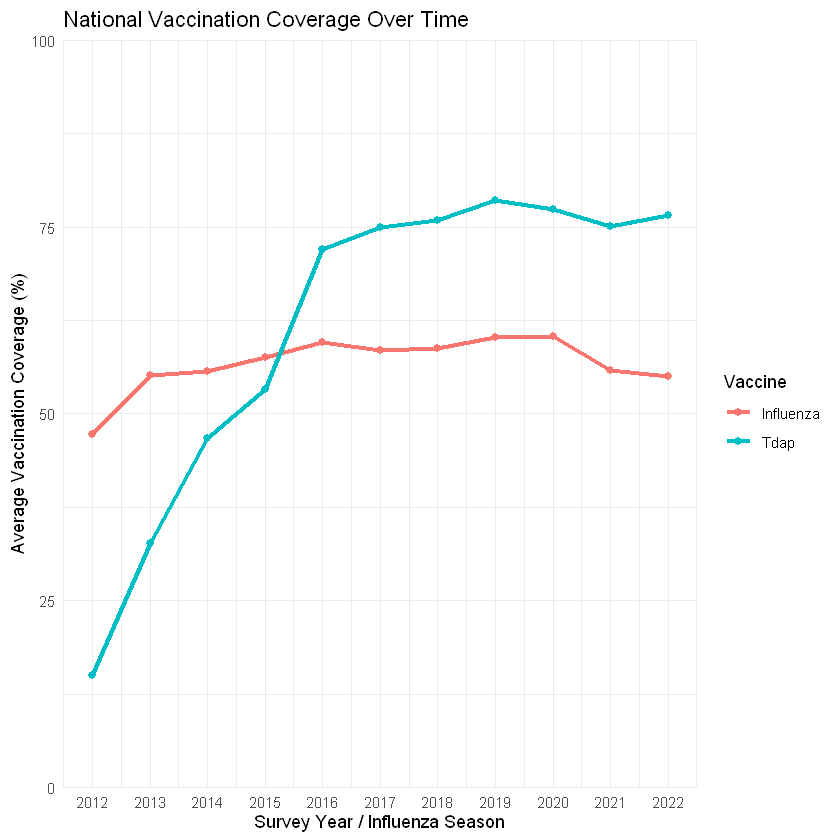

In [84]:
#### National Tdap and Influenza Vaccination Coverage (%) over time (2012-2022) ####
#Question: How has the coverage of Tdap and Influenza vaccination changed over time?

# Filter to national + the two vaccines of interest
national <- vaccines %>%
  filter(
    geography_type == "National",
    vaccine %in% c("Tdap", "Influenza"),
    dimension_type == "Age"
  )

# Average across all age and race/ethnicity subgroups
national_avg <- national %>%
  group_by(vaccine, year) %>%
  summarise(
    avg_coverage = mean(estimate, na.rm = TRUE),
    .groups = "drop"
  )

# Plot Tdap and Influenza over time
ggplot(national_avg,
       aes(x = year,
           y = avg_coverage,
           color = vaccine,
           group = vaccine)) +
  geom_line(linewidth = 1.2) +
  geom_point(size = 2) +
  labs(
    title = "National Vaccination Coverage Over Time",
    x = "Survey Year / Influenza Season",
    y = "Average Vaccination Coverage (%)",
    color = "Vaccine"
  ) +
  theme_minimal() +
    scale_y_continuous(limits = c(0, 100), expand = c(0,0)) + # y-axis 0-100%
      scale_x_continuous(breaks = seq(min(national_avg$year), max(national_avg$year), by = 1)) # one tick per year

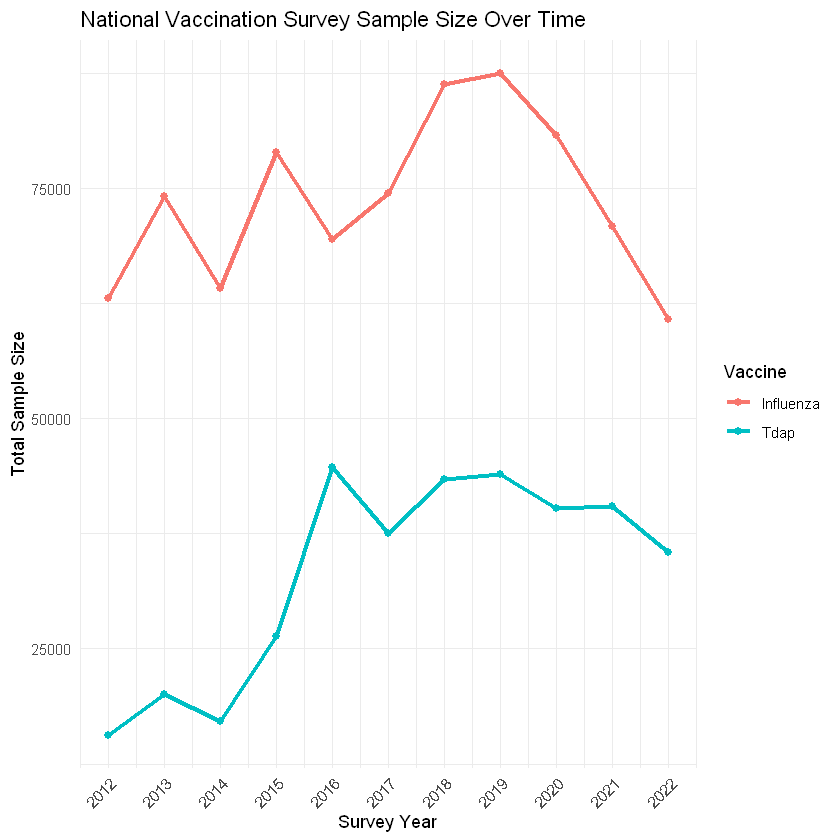

In [85]:
#### Sample size for Tdap and Influenza vaccinations data from PRAMS survey over time (2012-2022) ####
#Question: How has the sample size of Tdap and influenza vaccinations data collected from PRAMS changes over time? 

# Sum sample size across subgroups
national_sample <- national %>%
  group_by(vaccine, year) %>%
  summarise(
    total_sample = sum(as.numeric(sample_size), na.rm = TRUE),
    .groups = "drop"
  )

# Plot sample size over time
ggplot(national_sample,
       aes(x = year,
           y = total_sample,
           color = vaccine,
           group = vaccine)) +
  geom_line(linewidth = 1.2) +
  geom_point(size = 2) +
  labs(
    title = "National Vaccination Survey Sample Size Over Time",
    x = "Survey Year",
    y = "Total Sample Size",
    color = "Vaccine"
  ) +
  theme_minimal() +
  scale_x_continuous(breaks = seq(min(national_sample$year), max(national_sample$year), by = 1)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

**Questions:**
1. What are the dominant patterns of variation in influenza vaccination coverage across states?
2. Are there any specific variables of interest (geography, race/ethnicity, maternal age) that explain influenza vaccination coverage?
3. Are age groups or race/ethnicity important drivers of variation?
4. Which states are most similar or most different in overall demographic vaccination profiles?
5. Is there any distinct clustering when states are grouped into regions of the US?

**Analysis Plan:**
1. Dimensionality reduction - PCA
2. Clustering 

In [86]:
#### Influenza ####

influenza_states <- vaccines %>%
  filter(geography_type == "States", vaccine == "Influenza") %>%  
  select(geography, dimension_type, dimension, estimate) %>%
  mutate(estimate = as.numeric(estimate))  # ensure numeric

# Pivot wider so each demographic subgroup becomes a column
influenza_pivot <- influenza_states %>%
  pivot_wider(
    names_from = c(dimension_type, dimension),
    values_from = estimate
  ) %>%
  column_to_rownames("geography")  # set states as row names

# Remove rows with any NA values
influenza_list <- na.omit(influenza_pivot)

influenza_numeric <- influenza_list %>%
  mutate(across(
    where(is.list),
    ~ mean(unlist(.x), na.rm = TRUE)  # collapse list into single numeric
  ))

# Check structure
# print(influenza_numeric) #

Warning message:
"Values from `estimate` are not uniquely identified; output will contain list-cols.
• Use `values_fn = list` to suppress this warning.
• Use `values_fn = {summary_fun}` to summarise duplicates.
• Use the following dplyr code to identify duplicates.
  {data} |>
  dplyr::summarise(n = dplyr::n(), .by = c(geography, dimension_type, dimension)) |>
  dplyr::filter(n > 1L)"


In [87]:
#### Influenza PCA ####

influenza_states <- vaccines %>%
  filter(geography_type == "States", vaccine == "Influenza") %>%  
  mutate(estimate = as.numeric(estimate))  # ensure numeric

#Average coverage across years for each state × demographic
influenza_avg <- influenza_states %>%
  group_by(geography, year, dimension_type, dimension) %>%  # keep year here if needed
  summarise(
    avg_estimate = mean(estimate, na.rm = FALSE),
    .groups = "drop"
  ) %>%
  group_by(geography, dimension_type, dimension) %>%  # now average across years
  summarise(
    avg_estimate = mean(avg_estimate, na.rm = FALSE),
    .groups = "drop"
  )

#Pivot wider so each demographic subgroup becomes a column
influenza_pivot <- influenza_avg %>%
  pivot_wider(
    names_from = c(dimension_type, dimension),
    values_from = avg_estimate
  ) %>%
  column_to_rownames("geography")  # set states as row names

#Replace remaining NAs with column mean
influenza_numeric <- influenza_pivot %>%
  mutate(across(everything(), ~ ifelse(is.na(.x), mean(.x, na.rm = TRUE), .x)))

str(influenza_numeric)

'data.frame':	51 obs. of  8 variables:
 $ Age_18-24 Years                                         : num  37.9 59.7 44.9 51 61.6 ...
 $ Age_25-34 Years                                         : num  50.2 57.7 52.3 59.4 68.5 ...
 $ Age_>=18 Years                                          : num  46.7 58.8 51 56.1 68.1 ...
 $ Age_>=35 Years                                          : num  52.6 62.2 54.4 63.6 73.4 ...
 $ Race and Ethnicity_Black, Non-Hispanic                  : num  38.4 47.5 47.5 46.3 47.5 ...
 $ Race and Ethnicity_Hispanic                             : num  46.3 61.9 51.5 61.9 69.7 ...
 $ Race and Ethnicity_Other or Multiple Races, Non-Hispanic: num  66.1 65.1 62.5 66.1 66.1 ...
 $ Race and Ethnicity_White, Non-Hispanic                  : num  50.5 54.1 49.6 56.8 67.5 ...


In [88]:
influenza_scaled <- scale(influenza_numeric)
pca_influenza <- prcomp(influenza_scaled, center = TRUE, scale. = TRUE)
R <- solve(pca_influenza$rotation)
print(R)

    Age_18-24 Years Age_25-34 Years Age_>=18 Years Age_>=35 Years
PC1      0.38085682     0.403093827     0.40976991     0.39892654
PC2      0.07039202     0.018136170     0.01913468    -0.01202427
PC3      0.29117605     0.024171899     0.03504461    -0.17975491
PC4      0.32435028     0.336747647     0.27552047     0.23209821
PC5     -0.06236348     0.003637139    -0.11800401    -0.01824417
PC6      0.75441356    -0.260445144    -0.10443673    -0.49350384
PC7      0.24344716    -0.642323950    -0.19318455     0.69438504
PC8      0.16646592     0.492725308    -0.83212414     0.16876656
    Race and Ethnicity_Black, Non-Hispanic Race and Ethnicity_Hispanic
PC1                            0.296465726                   0.3203642
PC2                           -0.333844146                  -0.3004809
PC3                            0.694612637                  -0.5860630
PC4                           -0.449217166                  -0.1989330
PC5                            0.287773201         

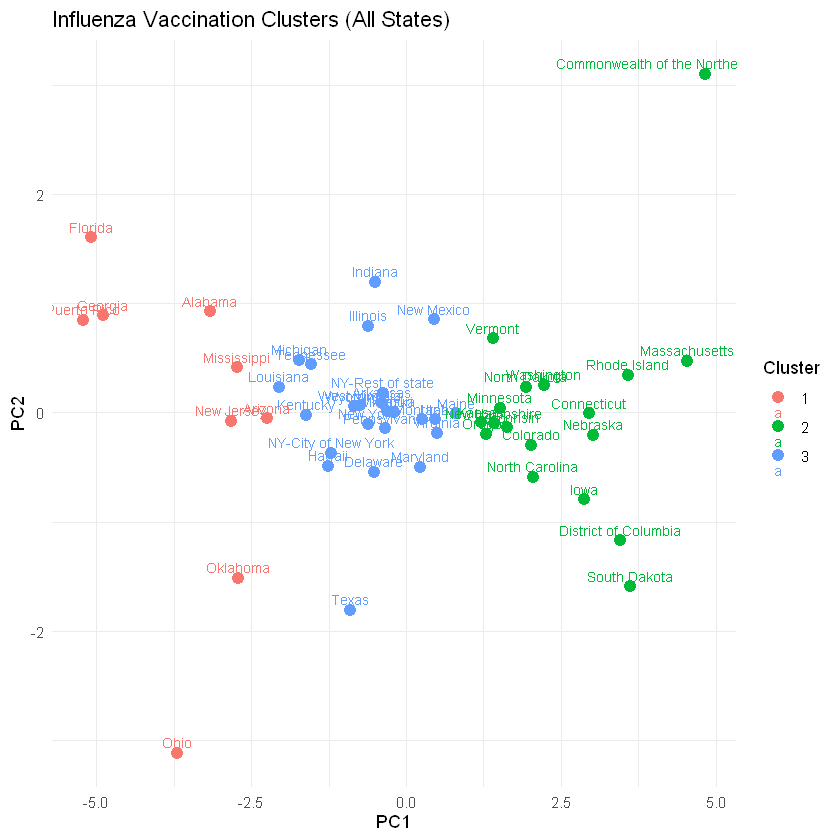

In [89]:
#### Influenza Clustering ####
influenza_scaled <- scale(influenza_numeric)  # scale numeric columns

# Run k-means clustering
set.seed(123)  # for reproducibility
k <- 3  # choose number of clusters

kmeans_influenza <- kmeans(influenza_scaled, centers = k, nstart = 25)

#Add cluster labels to your dataframe
influenza_clusters <- influenza_numeric %>%
  rownames_to_column("state") %>%
  mutate(cluster = factor(kmeans_influenza$cluster))

#PCA for visualization
pca_scores <- prcomp(influenza_scaled, center = TRUE, scale. = TRUE)$x[, 1:2] %>%
  as.data.frame() %>%
  mutate(
    state = influenza_clusters$state,
    cluster = influenza_clusters$cluster
  )

#Plot PCA with clusters
ggplot(pca_scores, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point(size = 3) +
  geom_text(aes(label = state), vjust = -0.5, size = 3) +  # optional labels
  labs(
    title = "Influenza Vaccination Clusters (All States)",
    x = "PC1",
    y = "PC2",
    color = "Cluster"
  ) +
  theme_minimal()

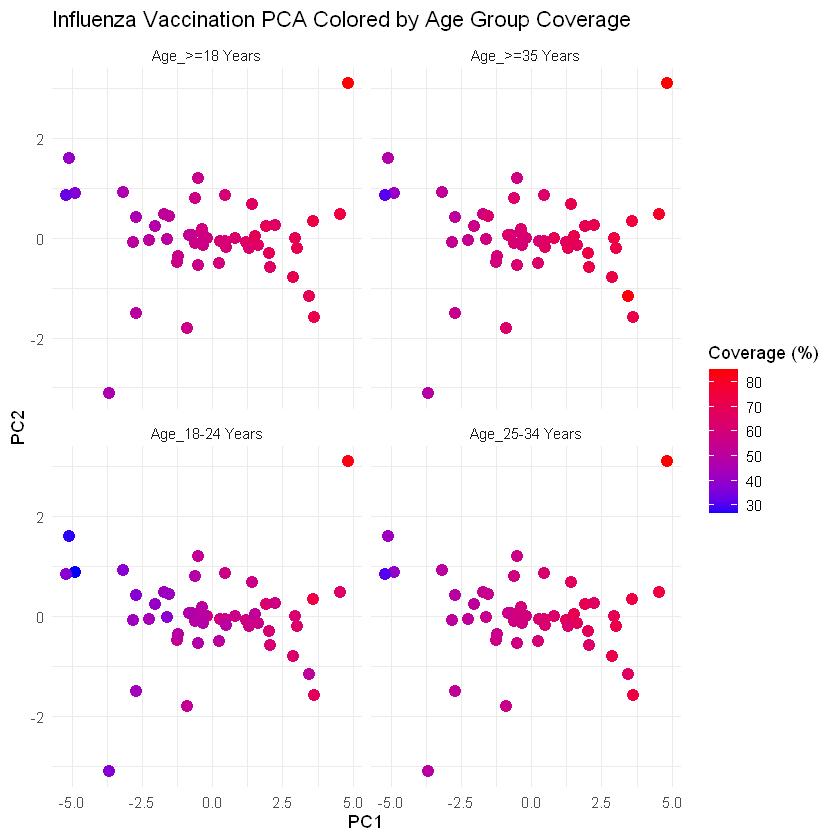

In [90]:
##Question: Does maternal age matter for vaccination coverage?

library(dplyr)
library(tidyr)
library(ggplot2)

#Select only age columns
age_columns <- grep("^Age_", names(influenza_numeric), value = TRUE)

#PCA on numeric data
pca_res <- prcomp(scale(influenza_numeric), center = TRUE, scale. = TRUE)
pca_scores <- as.data.frame(pca_res$x[, 1:2]) %>%
  mutate(state = rownames(influenza_numeric))

#Pivot age columns to long format
age_long <- influenza_numeric %>%
  select(all_of(age_columns)) %>%
  mutate(state = rownames(influenza_numeric)) %>%
  pivot_longer(
    cols = all_of(age_columns),
    names_to = "age_group",
    values_to = "coverage"
  )

#Combine PCA scores with age coverage
pca_age <- pca_scores %>%
  left_join(age_long, by = "state")

#Plot PCA, colored by coverage, faceted by age group
ggplot(pca_age, aes(x = PC1, y = PC2, color = coverage)) +
  geom_point(size = 3) +
  scale_color_gradient(low = "blue", high = "red") +
  facet_wrap(~ age_group) +
  labs(
    title = "Influenza Vaccination PCA Colored by Age Group Coverage",
    x = "PC1",
    y = "PC2",
    color = "Coverage (%)"
  ) +
  theme_minimal()

There is not a difference in PC1's prediction of vaccination coverage during pregancy with respect to maternal age.

In [91]:
#### Influenza Clustering with Regional Stratification ####

library(purrr)

#Create a state → region mapping
state_regions <- tibble(
  state = rownames(influenza_numeric),
  region = case_when(
    state %in% c("Connecticut", "Maine", "Massachusetts", "New Hampshire", "Delaware",
                 "Rhode Island", "Vermont", "New Jersey", "New York", "NY-City of New York", "NY-Rest of state", "Pennsylvania") ~ "Northeast",
    state %in% c("Florida", "Georgia", "Maryland", "North Carolina",
                 "South Carolina", "Virginia", "West Virginia", "Alabama", "Kentucky",
                 "Mississippi", "Tennessee", "Arkansas", "Louisiana", "Oklahoma", "Texas") ~ "South",
    state %in% c("Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin",
                 "Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota") ~ "Midwest",
    state %in% c("Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico",
                 "Utah", "Wyoming", "Alaska", "California", "Hawaii", "Oregon", "Washington") ~ "West",
    TRUE ~ NA_character_
  )
)

In [92]:
# Join regions to your numeric matrix
influenza_with_region <- influenza_numeric %>%
  rownames_to_column("state") %>%
  left_join(state_regions, by = c("state"))

#Split by region
influenza_by_region <- split(influenza_with_region, influenza_with_region$region)

#Run k-means for each region (example: k = 3)
set.seed(123) 

k <- 3  

influenza_region_clusters <- map(influenza_by_region, ~ {
  data_region <- .x %>%
    select(-state, -region)  # remove non-numeric columns
  
  #Scale data
  data_scaled <- scale(data_region)
  
  #Run k-means
  kmeans_result <- kmeans(data_scaled, centers = k, nstart = 25)
  
  # Return dataframe with cluster labels
  .x %>%
    mutate(cluster = kmeans_result$cluster)
})

influenza_clusters_all <- bind_rows(influenza_region_clusters)
head(influenza_clusters_all)

,state,Age_18-24 Years,Age_25-34 Years,Age_>=18 Years,Age_>=35 Years,"Race and Ethnicity_Black, Non-Hispanic",Race and Ethnicity_Hispanic,"Race and Ethnicity_Other or Multiple Races, Non-Hispanic","Race and Ethnicity_White, Non-Hispanic",region,cluster
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
1,Illinois,48.74000,58.24000,57.31000,63.52000,39.84000,56.71000,68.56000,60.98000,Midwest,1
2,Indiana,52.90000,56.40000,55.70000,58.20000,42.10000,64.10000,73.00000,55.90000,Midwest,1
3,Iowa,63.26250,72.26250,70.32500,72.93750,60.11250,69.06250,66.09383,71.58750,Midwest,2
4,Kansas,58.88333,68.01667,65.40000,65.93333,47.46188,63.91667,66.09383,66.20000,Midwest,2
5,Michigan,42.36000,54.34000,52.15000,57.80000,34.63000,61.89439,66.09383,55.80000,Midwest,1
6,Minnesota,51.83378,70.53333,68.78333,71.28333,47.46188,61.89439,67.16667,69.51667,Midwest,2


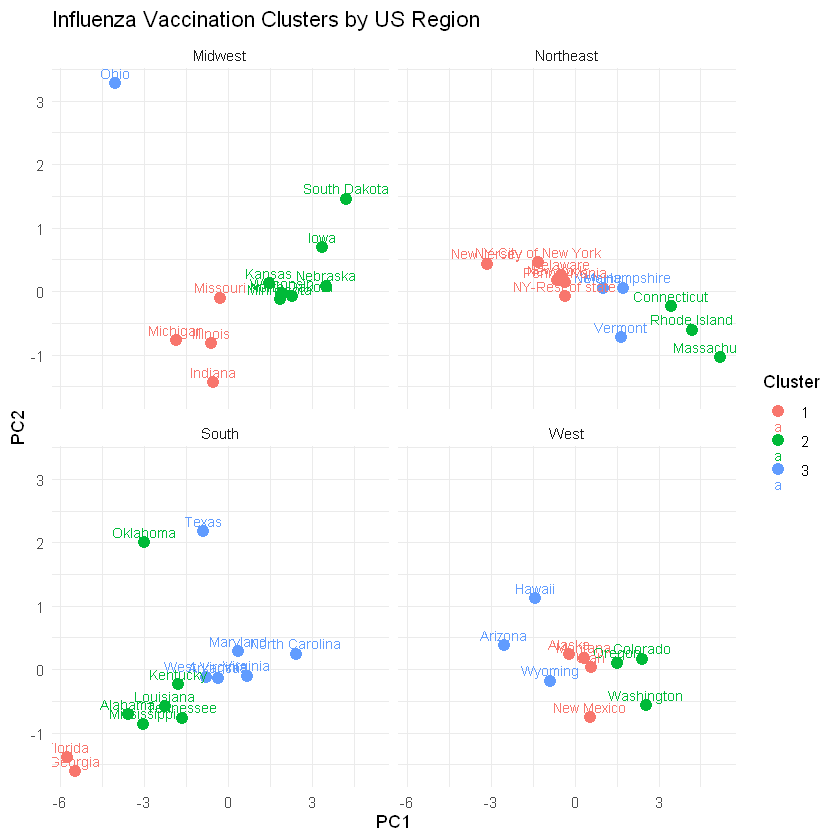

In [93]:
#PCA for visualization
pca_scores <- influenza_clusters_all %>%
  select(-state, -region, -cluster) %>%
  scale() %>%
  prcomp(center = TRUE, scale. = TRUE) %>%
  .$x %>%
  as.data.frame() %>%
  select(PC1, PC2)

#Add back metadata
pca_scores <- pca_scores %>%
  mutate(
    state = influenza_clusters_all$state,
    region = influenza_clusters_all$region,
    cluster = factor(influenza_clusters_all$cluster)
  )

#Plot PCA with clusters faceted by region (no ggrepel)
ggplot(pca_scores, aes(x = PC1, y = PC2, color = cluster)) +
  geom_point(size = 3) +
  geom_text(aes(label = state), vjust = -0.5, size = 3) +  # optional labels
  facet_wrap(~ region) +
  labs(
    title = "Influenza Vaccination Clusters by US Region",
    x = "PC1",
    y = "PC2",
    color = "Cluster"
  ) +
  theme_minimal()

PC1 and PC2 seem to have opposite relationships in the South and Northeast.

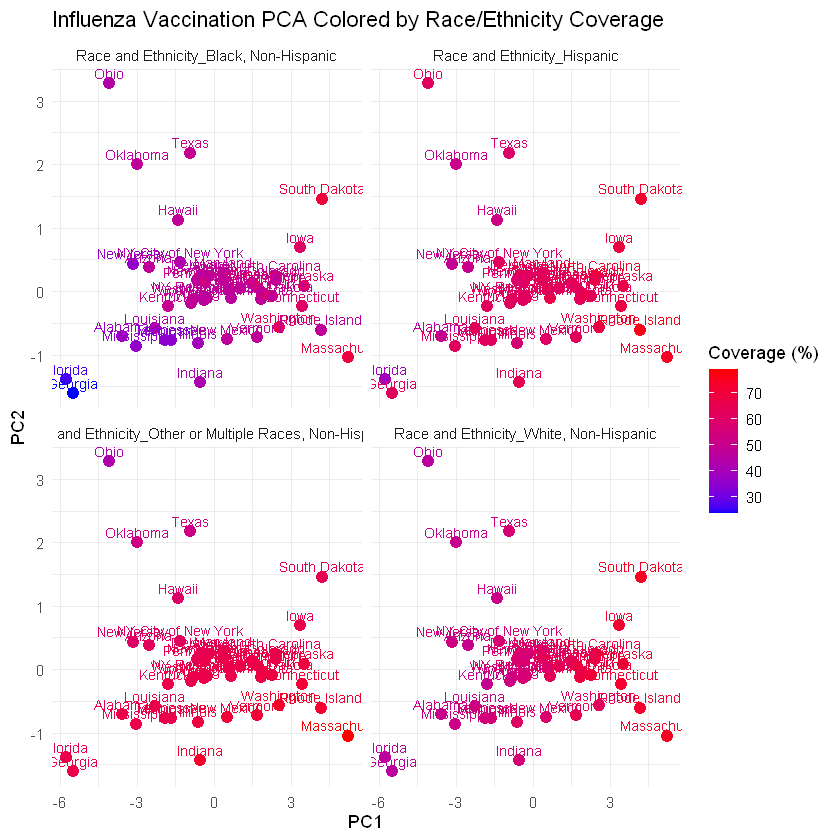

In [94]:
# Select PCA-relevant numeric columns (exclude metadata)
pca_data <- influenza_clusters_all %>%
  select(-state, -region, -cluster)

# Compute PCA
pca_scores <- prcomp(scale(pca_data), center = TRUE, scale. = TRUE)$x[, 1:2] %>%
  as.data.frame() %>%
  rename(PC1 = 1, PC2 = 2)

# Add back state and region
pca_scores <- pca_scores %>%
  mutate(
    state = influenza_clusters_all$state,
    region = influenza_clusters_all$region
  )

# Pivot the race/ethnicity columns to long format
race_columns <- c(
  "Race and Ethnicity_White, Non-Hispanic",
  "Race and Ethnicity_Black, Non-Hispanic",
  "Race and Ethnicity_Hispanic",
  "Race and Ethnicity_Other or Multiple Races, Non-Hispanic"
)

pca_long <- pca_scores %>%
  bind_cols(influenza_clusters_all[race_columns]) %>%  # add race columns
  pivot_longer(
    cols = all_of(race_columns),
    names_to = "race_ethnicity",
    values_to = "coverage"
  )

# Plot PCA with facets by race/ethnicity and color by coverage
ggplot(pca_long, aes(x = PC1, y = PC2, color = coverage)) +
  geom_point(size = 3) +
  geom_text(aes(label = state), vjust = -0.5, size = 3) +
  facet_wrap(~ race_ethnicity) +
  scale_color_gradient(low = "blue", high = "red") +
  labs(
    title = "Influenza Vaccination PCA Colored by Race/Ethnicity Coverage",
    x = "PC1",
    y = "PC2",
    color = "Coverage (%)"
  ) +
  theme_minimal()

There seems to be highest coverage in White, Nonhispanic and Other/multiple race, Non-hispanic pregnant persons. The least coverage is for Black pregnant persons. \
There are also some states that seems to have larger disparities by race and ethnicity, for example, Georgia and Florida. To me, this seems to be an important finding in the data and could be important to explore further. 

**Conclusions and future directions:**

Initial exploratory plots:
1. For the initial plot of vaccination coverage trends over time, it would be good to know if the data for each subgroup was weighted by population size for that group. I would want to see if the graph is different when doing a weighted average because this plot was an unweighted average of the vaccination coverage estimates.
2. For the second plot of sample size - there was a decrease in sample size especially since 2019. It would be interesting to find out if we can assume that this is indicating levels of reponse to surveys and if the COVID-19 pandemic contributed to these dropping levels. 

Regarding the PCA and clustering analysis:

1. There was not really a difference in PC1's prediction of vaccination coverage during pregancy with respect to maternal age. However, accessing prenatal care can be associated with maternal age and receiving prenatal care could influence whether a pregnant person received a vaccination. Therefore, I would be interested in exploring the age variable through further analysis and seeing if any other patterns emerge. 
2. Some future directions is to further explore the variable of race/ethnicity and understand how it is driving variation in vaccination coverage.
3. There also seems to be some relationship when plotting vaccination coverage stratified by region of the US. There seems to be more distinct patterns for the South and Northeast, and it would be interesting to explore that more and find out why. It may also be worth it to make more narrow stratifications such as separating the Western region into Northwest and Southwest and see if there are more clear patterns.
4. It would be interesting to explore if there are any interaction between the age and race/ethnicity variables because we don't have data on specifically which datapoints were of a certain age and of a certain race/ethnicity since they are aggregated into a coverage estimate. 